# **Análisis General de la Calidad de Vinos**

## **Proyecto 3**
## Aprendizaje automático de maquina
**Natalia Martinez Neira & Juan José Caballero**



---



## **Índice**

1. [Introducción](#intro)
    * [Antecedentes](#antecedentes)
    * [Problema](#problema)
    * [Solución](#solucion)
2. [Data Set](#data)
3. [Implementación](#implementacion)
4. [Resultados](#resultados)
5. [Referencias](#ref)

<a name="intro"></a>
## **Introducción**


<a name="antecedentes"></a>
### **Antecedentes**
El sector del vino representa más de $200,000 US al año y a pesar del alza en los precios de este, en Colombia sigue siendo uno de los productos más consumidos. Tiene una trayectoria histórica está presente en muchas de nuestras celebraciones. Consideramos que todos hemos escuchado por lo menos una vez hablar a nuestros padres sobre el sabor del vino, que uno es de mejor sabor que otro o prefieren ciertas texturas sobre otras.

La industria del vino sufrió una baja considerable en tiempos de pandemia y con base en una noticia del 2022 de la revista "La República", "sector del vino ha tenido un aumento en su extracción, consumo, venta y distribución alrededor del mundo, alcanzado 20% de crecimiento frente a la prepandemia.".

Esto nos ha llevado a preguntarnos, ¿Qué hace del vino una bebida tan especial? Buscaremos que características hacen que los expertos clasifiquen algo como un 'buen vino' y cómo se puede utilizar esta información para recuperar el crecimiento de la industria postpandemia. Y al nivel de nuestro nicho, el cómo encontrar un buen vino para disfrutar.


<a name="problema"></a>
### **Problema**

Se busca comparar distintos modelos y algoritmos de entrenamiento supervisado para predecir la calificación que obtendría un vino con base en sus características. Lo anterior buscando encontrar el mejor modelo para predecir. Se realizará fundamentado en una base de datos con registros de vinos tintos y blancos calificación por expertos del 1 - 10, siendo 1 la peor calificación y 10 la mejor.

A partir de esto, se buscará encontrar qué características pueden obtener una calificación de 10.


<a name="solucion"></a>
### **Solución**

Para darle solución al problema planteado, se compararán las bases de datos de calidad de vino tinto y blanco sobre los algoritmos de: ` regresión lineal, regresión de Ridge, regresión de Lasso, arboles de regresión, modelo SVM y KNN`.

Se trabajará con la base de tados de Vino tinto y Vino blanco, de las cuiales se harán predicciones con todos los modelos enunciados anteriormente y se evaluará el desempeño, buscando encontrar el mejor modelo.

Finalmente, se buscará predecir un vino de calidad 10 usando el modelo que de mejores resultados.

### **Índice de modelos**

*   [Regresión lineal](#lineal)
*   [Regresión de Ridge](#ridge)
*   [Regresión de Lasso](#lasso)
*   [Árboles de regresión](#arbol)
*   [Modelo SVM](#svm)
*   [KNN](#knn)



---



<a name="data"></a>
### **Dataset**

El Wine Quality Data Set se recopiló con el objetivo de evaluar la calidad del vino en base a diversas características. El conjunto de datos contiene información sobre vinos tintos y blancos, y está compuesto por datos numéricos. Se encuentra disponible en el repositorio de Machine Learning de la UCI (University of California, Irvine) en el siguiente vínculo: [Wine quality Data Set](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

Es importante tener en cuenta que el dataset contiene dos archivos separados: uno para vinos tintos y otro para vinos blancos. Cada archivo tiene información específica sobre las características y la calidad correspondientes al tipo de vino respectivo. Los archivos pueden ser descargados directamente de la página.


El dataset contiene los siguientes atributos:

* **Fixed acidity** (acidez fija): Representa la cantidad de ácido tartárico en el vino.

* **Volatile acidity** (acidez volátil): Indica la cantidad de ácido acético en el vino, que en niveles altos puede llevar a un sabor desagradable.

* **Citric acid** (ácido cítrico): Mide la cantidad de ácido cítrico presente en el vino, que le brinda frescura y sabor.

* **Residual sugar** (azúcar residual): Es la cantidad de azúcar que queda después de que el vino haya fermentado.

* **Chlorides** (cloruros): Representa la cantidad de sal presente en el vino.

* **Free sulfur dioxide** (dióxido de azufre libre): Mide la cantidad de dióxido de azufre que se encuentra en forma libre en el vino y que actúa como conservante.

* **Total sulfur dioxide** (dióxido de azufre total): Indica tanto el dióxido de azufre libre como el dióxido de azufre combinado con otros compuestos químicos en el vino.

* **Density** (densidad): Representa la densidad del vino en relación con el agua.

* **pH**: Indica el nivel de acidez o alcalinidad del vino.

* **Sulphates** (sulfatos): Mide la cantidad de sulfatos presentes en el vino, que pueden contribuir a su sabor y preservación.

* **Alcohol**: Representa el porcentaje de alcohol contenido en el vino.

* **Quality** (calidad): Es la calidad del vino, representada como una variable numérica discreta. Las puntuaciones varían en el rango de 0 a 10, donde un valor más alto indica una mayor calidad.

Quality es nuestra variable objetivo del estudio que, como mencionamos anteriormente, es un valor numérico de 1 a 10




---



<a name="implementacion"></a>
### **Implementación**

A continuación se realiza la implementación de código para obtener todos los resultados

In [ ]:
# Importamos las librerias correspondientes.

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Preparación de los datos

Importamos nuestras dos bases de datos para trabajar.

In [ ]:
df_red = pd.read_csv('winequality-red.csv', delimiter = ";").dropna()
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df_white = pd.read_csv('winequality-white.csv', delimiter = ";").dropna()
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


---

### Separación de variables

In [ ]:
# Asignamos las variables objetivo a y
# En X removemos la variable objetivo y una columna de enumeración

y_white = df_white['quality']
X_white = df_white.drop(['quality'], axis = 1)


y_red = df_red['quality']
X_red = df_red.drop(['quality'], axis = 1)

In [ ]:
# Entrenamos los conjunto de datos con una proporción de 75-25 en entrenamiento-testeo

X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, random_state = 0, test_size = 0.25, shuffle = True)

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, random_state = 0, test_size = 0.25, shuffle = True)



---



### **Regresion Lineal**
<a name="lineal"></a>

La regresión lineal es un método utilizado para predecir valores numéricos continuos. Se basa en la relación lineal entre nuestra variable de entrada (características o atributos) y una variable de salida (objetivo). La regresión lineal busca encontrar la mejor línea recta que se ajuste a los datos para realizar predicciones.

In [ ]:
# Creamos una matriz de lambdas para encontrar un valor óptimo para alpha

lambdas = 10**np.linspace(10,-2,100)

In [ ]:
# Entrenamos el modelo de regresión lineal

regr_white = LinearRegression()
regr_white.fit(X_train_white, y_train_white)
print("Coeficiente de determinación: ", regr_white.score(X_test_white, y_test_white))

Coeficiente de determinación:  0.24380039034360979


In [ ]:
regr_red = LinearRegression()
regr_red.fit(X_train_red, y_train_red)
print("Coeficiente de determinación: ", regr_red.score(X_test_red, y_test_red))

Coeficiente de determinación:  0.34542438124562935


Para este caso, los scores son valores muy bajos. De esto podemos decir que los datos están muy dispersos como para aplicarlos a un modelo de regresión lineal simple.



---



### **Regresión de Ridge**
<a name="ridge"></a>

La regresión de Ridge es una técnica utilizada para abordar el problema de alta correlación entre características y reducir la varianza del modelo. Agrega un término de regularización a la función de costo de la regresión lineal estándar.

Este término de regularización penaliza los coeficientes de las características, lo que ayuda a reducir su magnitud y evita que el modelo se ajuste demasiado a los datos de entrenamiento. La regresión de Ridge busca encontrar un equilibrio entre ajustarse a los datos y mantener coeficientes pequeños.

In [ ]:
ridge_white = Ridge()
ridge_red = Ridge()

coefs_white = []
coefs_red = []

for a in lambdas:
    ridge_white.set_params(alpha = a)
    ridge_red.set_params(alpha = a)

    ridge_white.fit(X_white, y_white)
    ridge_red.fit(X_red, y_red)

    coefs_white.append(ridge_white.coef_)
    coefs_red.append(ridge_red.coef_)

In [ ]:
# Imprimir las dimensiones de la matriz coeficientes

print("Dimensiones para vino blanco: ", np.shape(coefs_white))
print("Dimensiones para vino tinto: ", np.shape(coefs_red))

Dimensiones para vino blanco:  (100, 11)
Dimensiones para vino tinto:  (100, 11)


In [ ]:
ridgecv_white = RidgeCV(alphas = lambdas)
ridgecv_white.fit(X_train_white, y_train_white)
print("Alpha para vino blanco: ")
ridgecv_white.alpha_

Alpha para vino blanco: 


0.01

In [ ]:
ridgecv_red = RidgeCV(alphas = lambdas)
ridgecv_red.fit(X_train_red, y_train_red)
print("Alpha para vino tinto: ")
ridgecv_red.alpha_

Alpha para vino tinto: 


0.2848035868435805

In [ ]:
ridge_white = Ridge(alpha = ridgecv_white.alpha_)
ridge_white.fit(X_train_white, y_train_white)                     # Entrenar una regresión de Ridge para el conjunto de entrenamiento.
pred_white = ridge_white.predict(X_test_white)                    # Uso del modelo para predecir el conjunto de Testeo
print(pd.Series(ridge_white.coef_, index = X_white.columns))      # Imprimir los coeficientes del modelo
print(mean_squared_error(y_test_white, pred_white))               # Imprimit el error de mínimos cuadrados MSE

print("Coeficiente de determinaciòn:", ridge_white.score(X_test_white, y_test_white))         #Imprimir el coeficiente de determinación R^2

fixed acidity           -0.026579
volatile acidity        -1.873053
citric acid             -0.053014
residual sugar           0.030643
chlorides               -1.212502
free sulfur dioxide      0.005852
total sulfur dioxide    -0.001015
density                -13.842267
pH                       0.263198
sulphates                0.378314
alcohol                  0.344355
dtype: float64
0.6319548691260302
Coeficiente de determinaciòn: 0.2449323018573596


In [ ]:
ridge_red = Ridge(alpha = ridgecv_red.alpha_)
ridge_red.fit(X_train_red, y_train_red)                     # Entrenar una regresión de Ridge para el conjunto de entrenamiento.
pred_red = ridge_red.predict(X_test_red)                    # Uso del modelo para predecir el conjunto de Testeo
print(pd.Series(ridge_red.coef_, index = X_red.columns))    # Imprimir los coeficientes del modelo
print(mean_squared_error(y_test_red, pred_red))             # Imprimit el error de mínimos cuadrados MSE

print("Coeficiente de determinaciòn:", ridge_red.score(X_test_red, y_test_red))         #Imprimir el coeficiente de determinación R^2

fixed acidity           0.006569
volatile acidity       -1.230276
citric acid            -0.166604
residual sugar          0.013817
chlorides              -1.633229
free sulfur dioxide     0.002803
total sulfur dioxide   -0.002912
density                -0.052069
pH                     -0.458390
sulphates               0.798778
alcohol                 0.287230
dtype: float64
0.4002378282802988
Coeficiente de determinaciòn: 0.3451539249537503


El score para el vino blanco mejoró de manera mínima y el vino rojo empeoró igualemente de manera mínima. El cambio con respecto a la regresión lineal es casi imperceptible y los scores sigen siendo demasiado bajos.

---

### **Regresión de Lasso**
<a name="lasso"></a>
La regresión de Lasso (Least Absolute Shrinkage and Selection Operator) también es una técnica de regularización, al igual que la regresión de Ridge, agrega un término de regularización a la función de costo de la regresión lineal estándar. Sin embargo, a diferencia de Ridge, la regresión de Lasso utiliza una penalización basada en el valor absoluto de los coeficientes en lugar del valor al cuadrado. Esta penalización favorece la selección de características relevantes y puede llevar a un modelo más disperso con coeficientes exactamente iguales a cero, lo que proporciona una forma de selección automática de características. En resumen, la regresión de Lasso busca tanto ajustar los datos como seleccionar un subconjunto relevante de características.

In [ ]:
lassocv_white = LassoCV(alphas = lambdas)
lassocv_white.fit(X_train_white, y_train_white)
print("Valor óptimo de Lambda:", lassocv_white.alpha_)

lassocv_red = LassoCV(alphas = lambdas)
lassocv_red.fit(X_train_red, y_train_red)
print("Valor óptimo de Lambda:", lassocv_red.alpha_)

Valor óptimo de Lambda: 0.01
Valor óptimo de Lambda: 0.01


In [ ]:
lasso_white = Lasso(alpha = lassocv_white.alpha_)
lasso_white.fit(X_train_white, y_train_white)            # Entrenar una regresión de Ridge para el conjunto de entrenamiento.
pred_white = lasso_white.predict(X_test_white)

print("Error de mínimos cuadrados:")
print(mean_squared_error(y_test_white, pred_white))      # Imprimit el error de mínimos cuadrados MSE


lasso_red = Lasso(alpha = lassocv_red.alpha_)
lasso_red.fit(X_train_red, y_train_red)                  # Entrenar una regresión de Ridge para el conjunto de entrenamiento.
pred_red = lasso_red.predict(X_test_red)

print("Error de mínimos cuadrados:")
print(mean_squared_error(y_test_red, pred_red))          # Imprimit el error de mínimos cuadrados MSE

Error de mínimos cuadrados:
0.6543201436544384
Error de mínimos cuadrados:
0.4065433823267242


Para este caso, ambos scores mejoraron con respecto a las dos regresiones anteriores.



---



### **Árboles de regresión**
<a name="arbol"></a>

Los árboles de regresión son algoritmos utilizados para predecir valores numéricos continuos. Utilizan una estructura de árbol en la que cada nodo representa una característica y cada rama representa una decisión basada en esa característica. Los árboles se construyen dividiendo recursivamente los datos en subconjuntos más pequeños, minimizando la varianza dentro de cada subconjunto. Las predicciones se obtienen recorriendo el árbol desde el nodo raíz hasta llegar a una hoja, donde se obtiene el valor de predicción.

In [ ]:
# Creamos la lista de valores del atributo max_leaf_nodes

max_leaf_nodes = []

for i in range(2, 51):
    max_leaf_nodes.append(int(i))

In [ ]:
# Creamos la lista de valores del atributo max_depth

max_depth = []

for i in range(2, 51):
    max_depth.append(int(i))

In [ ]:
# Aplicamos el arbol de regresion con todos las combinaciones de valores que generamos anteriormente para hallar el score optimo de todos esos.

scores_white = 0
scores_graph_white = []

for a in max_leaf_nodes:
    for b in max_depth:
        clf_white = DecisionTreeRegressor(random_state = 0, max_leaf_nodes = a, max_depth = b)
        clf_white.fit(X_train_white, y_train_white)

        y_pred_white = clf_white.predict(X_test_white)

        v_white = clf_white.score(X_white, y_white)

        scores_graph_white.append(v_white)

        if v_white > scores_white: # Aca vamos eleccionando el score mas alto.
            scores_white = v_white
            mln = a
            md = b

print("max_leaf_nodes = ", a, "max_depth = ", b, "score = ", scores_white)

max_leaf_nodes =  50 max_depth =  50 score =  0.3986793930354242


In [ ]:
# Aplicamos el arbol de regresion con todos las combinaciones de valores que generamos anteriormente para hallar el score optimo de todos esos.

scores_red = 0
scores_graph_red = []

for a in max_leaf_nodes:
    for b in max_depth:
        clf_red = DecisionTreeRegressor(random_state = 0, max_leaf_nodes = a, max_depth = b)
        clf_red.fit(X_train_red, y_train_red)

        y_pred_red = clf_red.predict(X_test_red)

        v_red = clf_red.score(X_red, y_red)

        scores_graph_red.append(v_red)

        if v_red > scores_red: # Aca vamos eleccionando el score mas alto.
            scores_red = v_red
            mln = a
            md = b


print("max_leaf_nodes = ", a, "max_depth = ", b, "score = ", scores_red)

max_leaf_nodes =  50 max_depth =  50 score =  0.5246504505805071


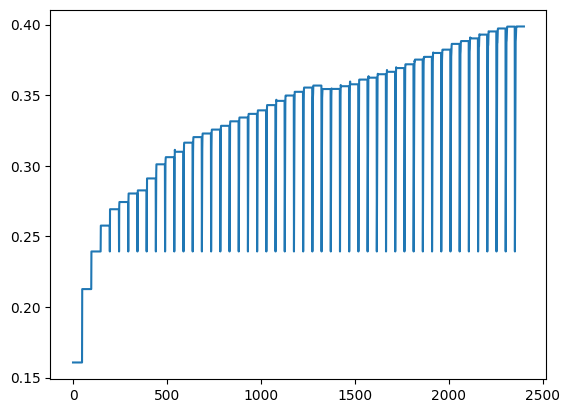

In [ ]:
plt.plot(scores_graph_white) # Graficamos los scores

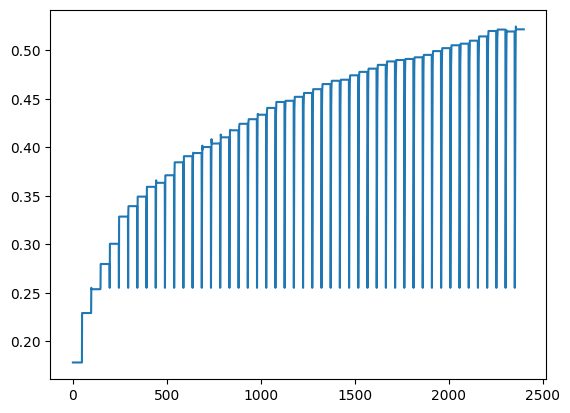

In [ ]:
plt.plot(scores_graph_red) #Graficamos los scores

Para este caso, el score del vino tinto mejoró considerablemente.



---



### **Modelo SVM**
<a name="svm"></a>

Las Máquinas de Vectores de Soporte (SVM) son modelos para clasificación y regresión. En el caso de la regresión, se usan para predecir valores numéricos continuos. SVM busca encontrar un hiperplano óptimo que separe los datos o se ajuste a los valores objetivo. Utiliza técnicas de optimización y transformación de espacios para lograr un buen rendimiento en la clasificación y regresión de datos. Es un modelo que encuentra un hiperplano que mejor separa los datos o se ajusta a los valores objetivo en la regresión, utilizando técnicas de optimización y transformación de espacios.



In [ ]:
scaler_train = preprocessing.StandardScaler()
scaler_test = preprocessing.StandardScaler()

X_train_scaled_white = scaler_train.fit_transform(X_train_white)
X_test_scaled_white = scaler_train.transform(X_test_white)

X_train_scaled_red = scaler_train.fit_transform(X_train_red)
X_test_scaled_red = scaler_train.transform(X_test_red)

In [ ]:
# Entrenamos SVM con nuestro conjunto de entrenamiento.

clf_white = SVC()
clf_white.fit(X_train_scaled_white, y_train_white)

y_pred_white = clf_white.predict(X_test_scaled_white)

In [ ]:
clf_red = SVC()
clf_red.fit(X_train_scaled_red, y_train_red)

y_pred_red = clf_red.predict(X_test_scaled_red)

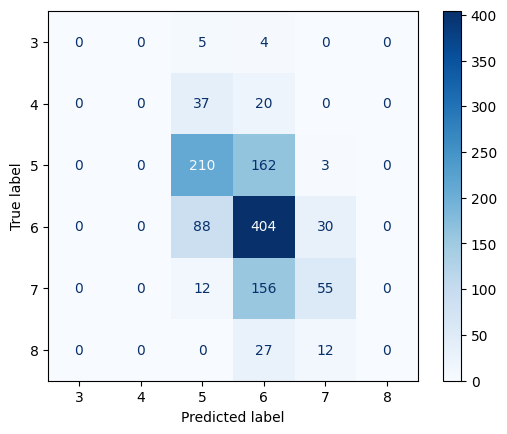

In [ ]:
cm_white = confusion_matrix(y_test_white, y_pred_white)

disp_white = ConfusionMatrixDisplay(confusion_matrix = cm_white, display_labels = ['3', '4', '5', '6', '7', '8'])
disp_white.plot(cmap = 'Blues')

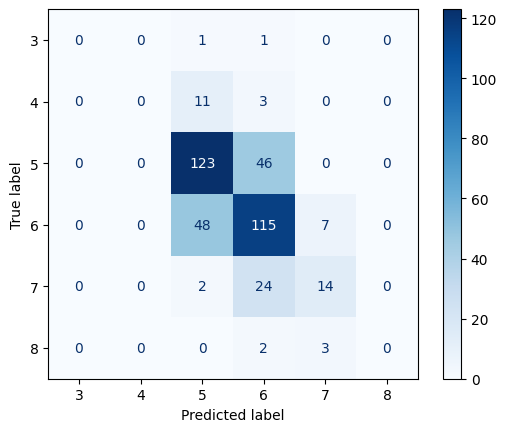

In [ ]:
cm_red = confusion_matrix(y_test_red, y_pred_red)

disp_red = ConfusionMatrixDisplay(confusion_matrix = cm_red, display_labels = ['3', '4', '5', '6', '7', '8'])
disp_red.plot(cmap = 'Blues')

In [ ]:
num_features = np.size(X_train_scaled_white, axis=1)
param_grid = [
  {'C': [1, 10, 100, 1000],
   'gamma': [1/num_features, 1, 0.1, 0.01, 0.001, 0.0001],
   'kernel': ['rbf']},
]


optimal_params_white = GridSearchCV(
        SVC(),
        param_grid,
        cv=5,
        scoring = 'accuracy',
        verbose=0
    )

optimal_params_white.fit(X_train_scaled_white, y_train_white)
print(optimal_params_white.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
num_features = np.size(X_train_scaled_red, axis=1)
param_grid = [
  {'C': [1, 10, 100, 1000],
   'gamma': [1/num_features, 1, 0.1, 0.01, 0.001, 0.0001],
   'kernel': ['rbf']},
]


optimal_params_red = GridSearchCV(
        SVC(),
        param_grid,
        cv=5,
        scoring = 'accuracy',
        verbose=0
    )

optimal_params_red.fit(X_train_scaled_red, y_train_red)
print(optimal_params_red.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


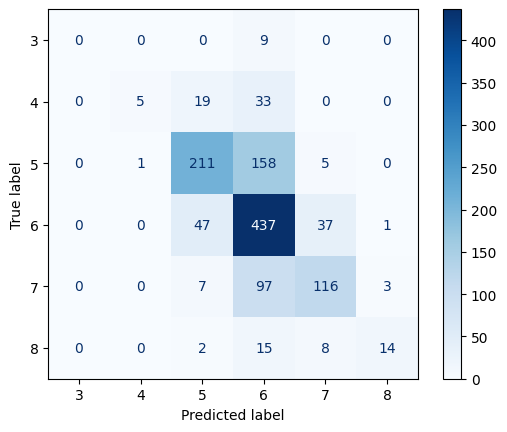

In [ ]:
clf_optimo_white = SVC(kernel = 'rbf', C = 10, gamma = 1)
clf_optimo_white.fit(X_train_scaled_white, y_train_white)

y_pred_optimo_white = clf_optimo_white.predict(X_test_scaled_white)

cm_optimo_white = confusion_matrix(y_test_white, y_pred_optimo_white)

disp_optimo_white = ConfusionMatrixDisplay(confusion_matrix = cm_optimo_white, display_labels = ['3', '4', '5', '6', '7', '8'])
disp_optimo_white.plot(cmap = 'Blues')

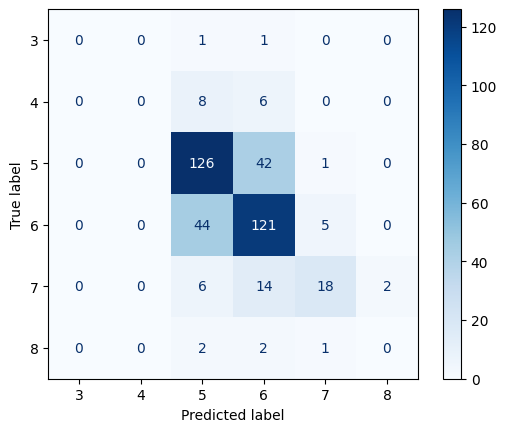

In [ ]:
clf_optimo_red = SVC(kernel = 'rbf', C = 1, gamma = 1)
clf_optimo_red.fit(X_train_scaled_red, y_train_red)

y_pred_optimo_red = clf_optimo_red.predict(X_test_scaled_red)

cm_optimo_red = confusion_matrix(y_test_red, y_pred_optimo_red)

disp_optimo_red = ConfusionMatrixDisplay(confusion_matrix = cm_optimo_red, display_labels = ['3', '4', '5', '6', '7', '8'])
disp_optimo_red.plot(cmap = 'Blues')

---

### **KNN**
<a name="knn"></a>

KNN (K-Nearest Neighbors) es un algoritmo utilizado tanto para clasificación como para regresión. En KNN, se asigna una etiqueta o se predice un valor basándose en los vecinos más cercanos al punto de consulta. En clasificación, se eligen los K vecinos más cercanos y se asigna la etiqueta más común. En regresión, se promedia o pondera los valores objetivo de los K vecinos más cercanos. El valor de K, que representa la cantidad de vecinos considerados, es importante para obtener resultados precisos en el modelo.

En resumen, KNN es un algoritmo que utiliza los vecinos más cercanos para asignar etiquetas o predecir valores, y su rendimiento depende de elegir el valor correcto de K.

In [ ]:
scores_white = []

for i in range(1, 100):

  knn_white = KNeighborsClassifier(n_neighbors = i)
  knn_white.fit(X_train_white, y_train_white)
  sc_white = knn_white.score(X_test_white, y_test_white)
  scores_white.append(sc_white)

# Para poder obtener los resultados y valores se imprimieron los scores, pero para fines de orden se borró

In [ ]:
scores_red = []

for i in range(1, 100):

  knn_red = KNeighborsClassifier(n_neighbors = i)
  knn_red.fit(X_train_red, y_train_red)
  sc_red = knn_red.score(X_test_red, y_test_red)
  scores_red.append(sc_red)

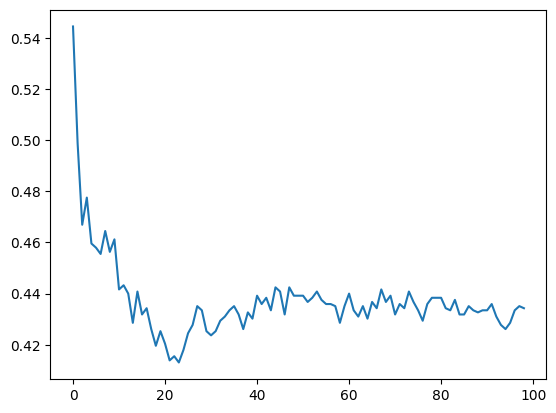

In [ ]:
plt.plot(scores_white)

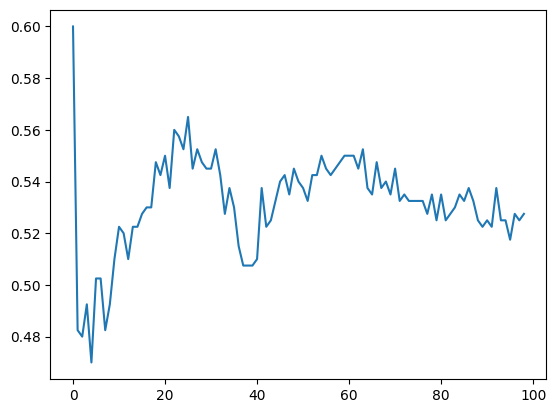

In [ ]:
plt.plot(scores_red)

In [ ]:
knn_white = KNeighborsClassifier(n_neighbors = 1)
knn_white.fit(X_train_white, y_train_white)
accuracy_white = accuracy_score(y_test_white, y_pred_white)
print(f'Accuracy: {accuracy_white:.2f}')

Accuracy: 0.55


In [ ]:
knn_red = KNeighborsClassifier(n_neighbors = 1)
knn_red.fit(X_train_red, y_train_red)
accuracy_red = accuracy_score(y_test_red, y_pred_red)
print(f'Accuracy: {accuracy_red:.2f}')

Accuracy: 0.63


El modelo de KNN para los vinos tintos presentó un accuracy satiscatorio.

---

### **Resultados**
<a name="resultados"></a>

Luego de implementar los distintos modelos para cada una de las bases de datos, fue posible evidenciar que el modelo de `SVM` fue el mejor para la base de vino blanco, mientras que el modelo de `árboles de regresión` y en el `KNN` fueron mejores para el vino tinto.

Analizando las bases de datos, lo anterior se puede deber a distintos motivos; consideramos que estos son algunos de ellos:

* Los árboles de regresión son menos sensibles a valores atípicos, los cuales podemos observar en la base de datos del vino tinto.
* El modelo SVM utiliza regularización estructural que es un sobreajuste natural. Esto ayuda a cuando hay desequilibrio de datos, cosa que podemos observar en la base de vinos blancos.
* El modelo de KNN puede capturar relaciones no lineales de manere más sencilla, ya que no asume ninguna forma específica para la función. Gracias a esto, puedo adaptarse mejor a los datos del vino tinto. A demás, el data set del vino tinto tiene caracteristicas que dominan las distancias.



---

### **Referencias**
<a name="ref"></a>

*  "Larepublica.co." La República. Consumo de vino en Colombia registra un aumento de 78% durante los últimos años. [En línea]. Disponible en: https://www.larepublica.co/empresas/consumo-de-vino-en-colombia-registro-un-aumento-de-78-durante-los-ultimos-anos-3337502 (Accedido el 23 de mayo de 2023).

*   "Larepublica.co." La República. La tendencia de consumo en ese país viene a la baja, pues en 2005 la tasa de crecimiento fue de 22.28% cayó 0.90%. [En línea]. Disponible en: https://www.larepublica.co/ocio/la-tendencia-de-consumo-en-ese-pais-viene-a-la-baja-pues-en-2005-la-tasa-de-crecimiento-fue-de-22-28-cayo-0-90-3545171 (Accedido el 23 de mayo de 2023).

*   "Jones, P., Comfort, D., & Hillier, D." (2009). Demand for wine in Ontario: an econometric investigation. Food Policy, 34(3), 283-290. DOI: 10.1016/j.foodpol.2009.02.004.

*   Árboles de regresión: Scikit-learn. (s.f.). Decision Trees. Recuperado de https://scikit-learn.org/stable/modules/tree.html

* Máquinas de vectores de soporte (SVM): Scikit-learn. (s.f.). Support Vector Machines. Recuperado de https://scikit-learn.org/stable/modules/svm.html

* KNN (k-Nearest Neighbors): Scikit-learn. (s.f.). Nearest Neighbors. Recuperado de https://scikit-learn.org/stable/modules/neighbors.html